**Task 1.**

Gabriel is currently enrolled in Data Analytics and he wants to estimate his mark based on the number of hours he will be spending studying for that class. He asked 10 former students in the same class how many hours they spent studying for that class and the score they got for the quiz. He shared the information he gathered  with you as presented below.

**Solution**

Below you will see how I transpoted the data to the notebook. I have chosen this way to practice how manipulating the data. I could also create a CSV document and save in my google drive and reference it, like we have done in Pokemon examples in the classes.

[continuous after code...]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#creating the data to be dealt, according to table given
hours_spent = pd.Series([130, 50, 115, 80, 65, 150, 78, 67, 60, 100],
                 index = ["Ming", "Delphine", "Amir", "Bibek", "Alesso", "Farah", "Pham", "Bruce", "Dalisay", "Susilo"])

quiz_score = pd.Series([15, 20, 23, 12, 20, 25, 30, 12, 10, 35],
                       index = ["Ming", "Delphine", "Amir", "Bibek", "Alesso", "Farah", "Pham", "Bruce", "Dalisay", "Susilo"])

mark = pd.Series([78, 69, 80, 65, 70, 87, 80, 82, 70, 90],
                 index = ["Ming", "Delphine", "Amir", "Bibek", "Alesso", "Farah", "Pham", "Bruce", "Dalisay", "Susilo"])

data = pd.concat([hours_spent, quiz_score, mark], axis = 1)


#rename rows and columns

data.rename(columns={ 0: "hours_spent",
                      1: "quiz_score",
                      2: "mark"},
            index={0 : "Ming", 
                   1: "Delphine", 
                   2: "Amir", 
                   3: "Bibek",
                   4: "Alesso",
                   5: "Farah",
                   6: "Pham", 
                   7: "Bruce", 
                   8: "Dalisay", 
                   9: "Susilo"},
            inplace=True)

#printing the table to make sure we are dealing with the right data.
data.head(10)




,hours_spent,quiz_score,mark
Ming,130,15,78
Delphine,50,20,69
Amir,115,23,80
Bibek,80,12,65
Alesso,65,20,70
Farah,150,25,87
Pham,78,30,80
Bruce,67,12,82
Dalisay,60,10,70
Susilo,100,35,90


Above we have add the data given. So we can work with the help of Python. As you can see, the table has been correclty transpoted and now we can work with the data.

Bellow, we are going to print the correlation matrix of the data. That will help us to understad how our predictions will work in the future.

[continuous after code...]

In [2]:
#To get the correlation, we do the following code:
data.corr()

,hours_spent,quiz_score,mark
hours_spent,1.000000,0.314188,0.616345
quiz_score,0.314188,1.000000,0.657956
mark,0.616345,0.657956,1.000000


In the table above we can see that the biggest correlation is between **Mark** and **Quiz Score**. It means that if Gabriel has a bigger value is the quiz score, he has bigger chance to have higher score in his marks. The correlation is approximately 66%.

Moreover, the correlation between **Hours of Study Spent** and **Mark** is lower, comming to aproximately 61%. It is not a huge difference, but it shows that going well in the quiz makes Gabriel having a better chance for better grades.

Now that we have the data above, we can continuous. I will separate the prediction in two: **"Quiz Score X Mark"** and **"Hours Spent X Mark"**. Thats beacause, I believe doing both will give me a interval of whats going to be Gabriel's final marks.

**ALPHA AND BETA**

To estimate our variable of interest (Mark, in this case) we need to calculate alpha and beta. That comes up with the best line (the best fit) in the prediction. It also brings the parameters minimising the sum of squared difference between the variable we want to predict (Y or mark) and the estimated value. That means we will be able to represent the lowest average distance in between the data we have and will give us possible predictions.

The formula we have is: 
Ye = α + βX

We need to calculate  alpha and Beta first, as we already have X. Below, we will show the process of calculating both values.

Then, the X value is considered the value we have and the Y value will be the output. In this sense, in the first situation, where we make the prediction using Quiz Score and Mark, the X value will be Gabriel's quiz scored (24) and Y will represent his final grade predicted.

After this correlation, we also will implement the same calculations, but using Hours of Studeis as X and Mark as Y. 

Making both option will give as a better view of what can happen with Gabriel's mark according to the data given. Which will bring us two values and we can interpret as "Gebriel's mark will be in between both options". 

We will also draw two graphs, one for each correlation, so we can have the figure to help us see what happens. 

RESULTS IN THE CODE and after
[continuous after code...]


Our X mean value is: 
20.2

Our Y mean value is: 
77.1

Our Beta value is: 
0.6618705035971222

Our alpha value is: 
63.73021582733813

Gabriel's final mark, according to his quiz score will be: 
79.61510791366906



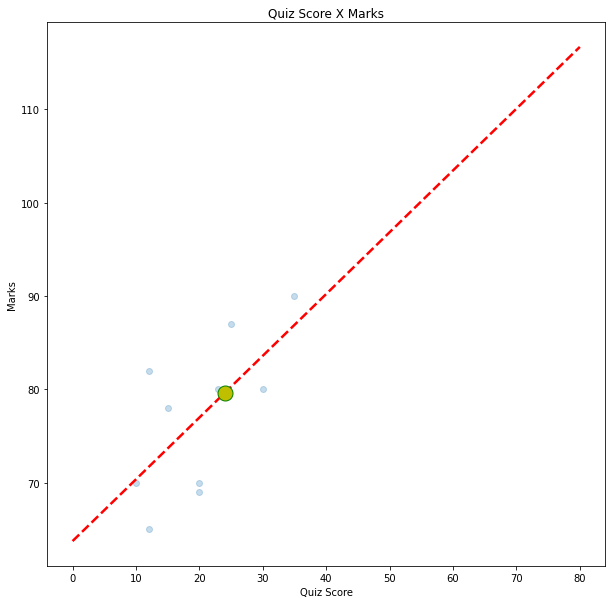

In [3]:
#First I will do Quiz an Mark correlation. 
#Here we will slice columns we are interested:
features = data[["quiz_score", "mark"]]

#Using OSL to fit a linear model to the data

#Calculating the mean of X and Y:
x_mean = features["quiz_score"].mean()
print("Our X mean value is: ")
print(x_mean)
print()
y_mean = features["mark"].mean()
print("Our Y mean value is: ")
print(y_mean)
print()

#Calculating Cov and Var so we can get Beta and Alpha
xycov = (features["quiz_score"] - x_mean) * (features["mark"] - y_mean)
xvar = (features["quiz_score"] - x_mean)**2
#We will also create to "new values" in the data, XYcov and xvar:
features["XYcov"] = xycov
features["Xvar"] = xvar

#Calculating Beta and alpha according to results above
beta = features["XYcov"].sum()/features["Xvar"].sum()
alpha = y_mean - beta * x_mean

#The values of Beta and Alpha are below and will be printed in the results after.
print("Our Beta value is: ")
print(beta)
print()
print("Our alpha value is: ")
print(alpha)
print()


x = np.linspace(0, 80, 10)

#the X_pred is Gabriel's score for the quiz, wich the task gave us as 24 
X_pred = 24
Y_pred = alpha + X_pred * beta
print("Gabriel's final mark, according to his quiz score will be: ")
print(Y_pred)
print()


#plot data:
plt.figure(figsize=(10,10))

#The line below is the Best Fit according to alpha and Beta we found
plt.plot(x, alpha + x * beta, "r--", linewidth=2.5)
#The mark created below will represent where Gabriel's mark will be standing according to prediction
plt.plot(X_pred, Y_pred, "yo", markersize=15, markeredgecolor="g")
#Here we are plotting the data of quiz and mark in the graph that will be shown after.
plt.scatter(features["quiz_score"].to_numpy(), features["mark"].to_numpy(), alpha=0.25)

#Creating the titles and labels for the graph so we can understand better in the figure
plt.title("Quiz Score X Marks")
plt.xlabel("Quiz Score")
plt.ylabel("Marks")
plt.show()

As we said above, we wil use exactly the same process to calculate alpha and beata. So we can come up with the prediction. In this case, the only differece is the X value, where we will considere the Hour of Study Spent values to predict Gabriél final mark. 

Find bellow the calculations:



Our X mean value is: 
89.5

Our Y mean value is: 
77.1

Our Beta value is: 
0.1547273560409348

Our alpha value is: 
63.251901634336335

Gabriel's final mark, according to his quiz score will be: 
74.85645333740645



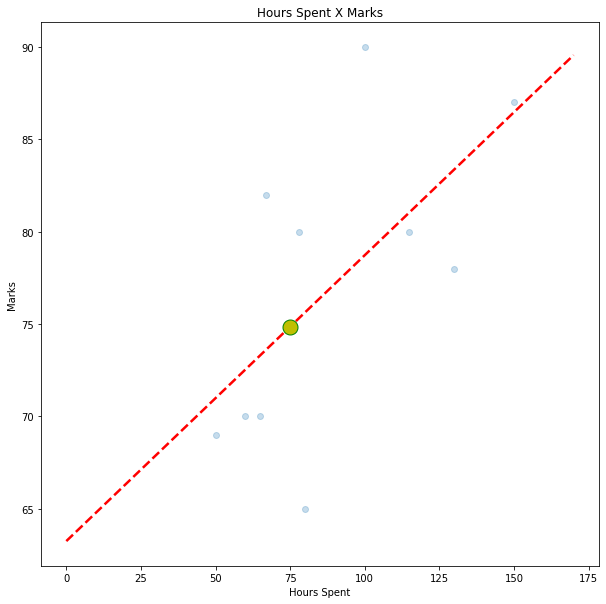

In [0]:
#Here we will slice columns we are interested:
features = data[["hours_spent", "mark"]]

#checjing we have get the right data set:
features.head(10)
print()

#Using OSL to fit a linear model to the data

x_mean = features["hours_spent"].mean()
y_mean = features["mark"].mean()

print("Our X mean value is: ")
print(x_mean)
print()

print("Our Y mean value is: ")
print(y_mean)
print()


xycov = (features["hours_spent"] - x_mean) * (features["mark"] - y_mean)
xvar = (features["hours_spent"] - x_mean)**2
features["XYcov"] = xycov
features["Xvar"] = xvar
beta = features["XYcov"].sum()/features["Xvar"].sum()
alpha = y_mean - beta * x_mean

print("Our Beta value is: ")
print(beta)
print()
print("Our alpha value is: ")
print(alpha)
print()

x = np.linspace(0, 170, 50)

#the X_pred is how many hours Gabriel has studied 
X_pred = 75
Y_pred = alpha + X_pred * beta

print("Gabriel's final mark, according to his quiz score will be: ")
print(Y_pred)
print()

#plot data:
plt.figure(figsize=(10,10))

plt.plot(x, alpha + x * beta, "r--", linewidth=2.5)
plt.plot(X_pred, Y_pred, "yo", markersize=15, markeredgecolor="g")
plt.scatter(features["hours_spent"].to_numpy(), features["mark"].to_numpy(), alpha=0.25)

plt.title("Hours Spent X Marks")
plt.xlabel("Hours Spent")
plt.ylabel("Marks")
plt.show()


**CONCLUSION**

In conclusion, with a quiz score of 24 and 75 hours of studies, Gabriel's final mark will be in between 74 to 79. That is according to both prediction, where we could see has in between to 61% to 66% correlation to his final's mark.

**Values results:**

When considered **Quiz score and Mark**:

Our X mean value is: 
20.2

Our Y mean value is: 
77.1

Our Beta value is: 
0.6618705035971222

Our alpha value is: 
63.73021582733813

Gabriel's final mark, according to his quiz score will be: 
79.61510791366906

When considered **Hours Study and Mark**:

Our X mean value is: 
89.5

Our Y mean value is: 
77.1

Our Beta value is: 
0.1547273560409348

Our alpha value is: 
63.251901634336335

Gabriel's final mark, according to his quiz score will be: 
74.85645333740645